In [1]:
from datetime import datetime, timedelta, date
import pandas as pd
from constants import *
import series as s
from download import query_phe as query, download_phe as download, find_latest
from phe import plot_summary, read_csv, load_population, current_and_previous_data
from plotting import per1m_formatter, per1k_formatter, per0k_formatter
from vaccination import vaccination_dashboard, vaccination_changes
import requests

In [41]:
release=None

In [53]:
overview_data = query(
    filters={area_type: overview},
    structure=[release_timestamp, date_col, area_name, area_code,
               new_cases_by_specimen_date, new_admissions, new_deaths_by_death_date,
               new_virus_tests]
)
overview_data

,releaseTimestamp,date,areaName,areaCode,newCasesBySpecimenDate,newAdmissions,newDeaths28DaysByDeathDate,newVirusTests
0,2021-02-11,2021-02-10,United Kingdom,K02000001,2031,NaN,167.0,763311.0
1,2021-02-11,2021-02-09,United Kingdom,K02000001,10299,NaN,371.0,579266.0
2,2021-02-11,2021-02-08,United Kingdom,K02000001,14923,NaN,558.0,616718.0
3,2021-02-11,2021-02-07,United Kingdom,K02000001,11222,1842.0,532.0,584933.0
4,2021-02-11,2021-02-06,United Kingdom,K02000001,11820,1875.0,571.0,454008.0
...,...,...,...,...,...,...,...,...
373,2021-02-11,2020-02-03,United Kingdom,K02000001,0,NaN,NaN,NaN
374,2021-02-11,2020-02-02,United Kingdom,K02000001,1,NaN,NaN,NaN
375,2021-02-11,2020-02-01,United Kingdom,K02000001,1,NaN,NaN,NaN
376,2021-02-11,2020-01-31,United Kingdom,K02000001,2,NaN,NaN,NaN


In [54]:
download('england', 'nation', new_admissions_sum, new_cases_sum, new_deaths_sum, unique_people_tested_sum, area_name='England', release=release)

PosixPath('/Users/chris/coronavirus/data/england_2021-02-11.csv')

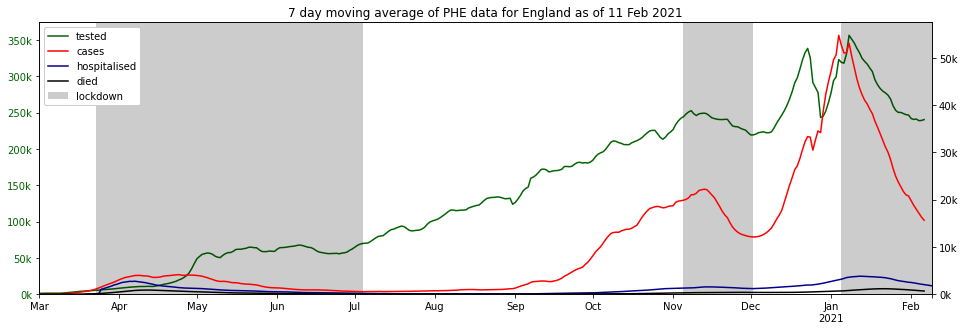

In [55]:
plot_summary(earliest_date='2020-03-01')

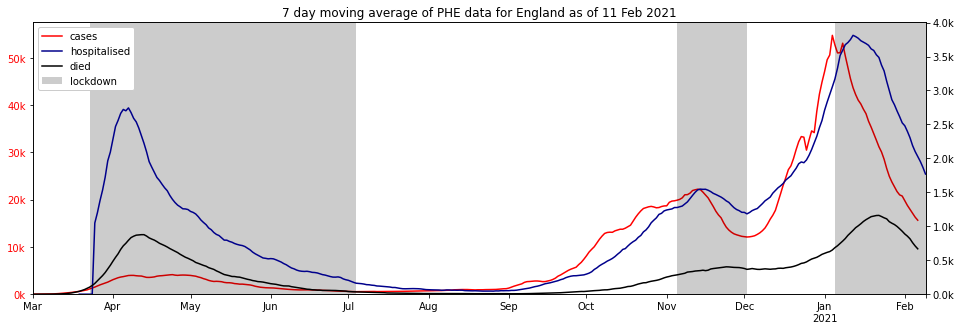

In [56]:
plot_summary(earliest_date='2020-03-01', left_series=(s.new_cases_sum,), 
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

In [57]:
download('vaccination', 'nation', *vaccination_new_and_weekly, release=release)

PosixPath('/Users/chris/coronavirus/data/vaccination_2021-02-11.csv')

In [58]:
download('vaccination_cum', 'nation', *vaccination_cumulative, release=release)

PosixPath('/Users/chris/coronavirus/data/vaccination_cum_2021-02-11.csv')

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,479320.0,11422507.0,10943187.0,56286961,0.851565,19.441780,79.706655
1,Northern Ireland,N92000002,28137.0,353757.0,325620.0,1893667,1.485847,17.195209,81.318944
2,Scotland,S92000003,13195.0,1048747.0,1035552.0,5463300,0.241521,18.954698,80.803782
3,Wales,W92000004,3795.0,684097.0,680302.0,3152879,0.120366,21.577168,78.302466


'partial: 13,509,108'

'full: 524,447'

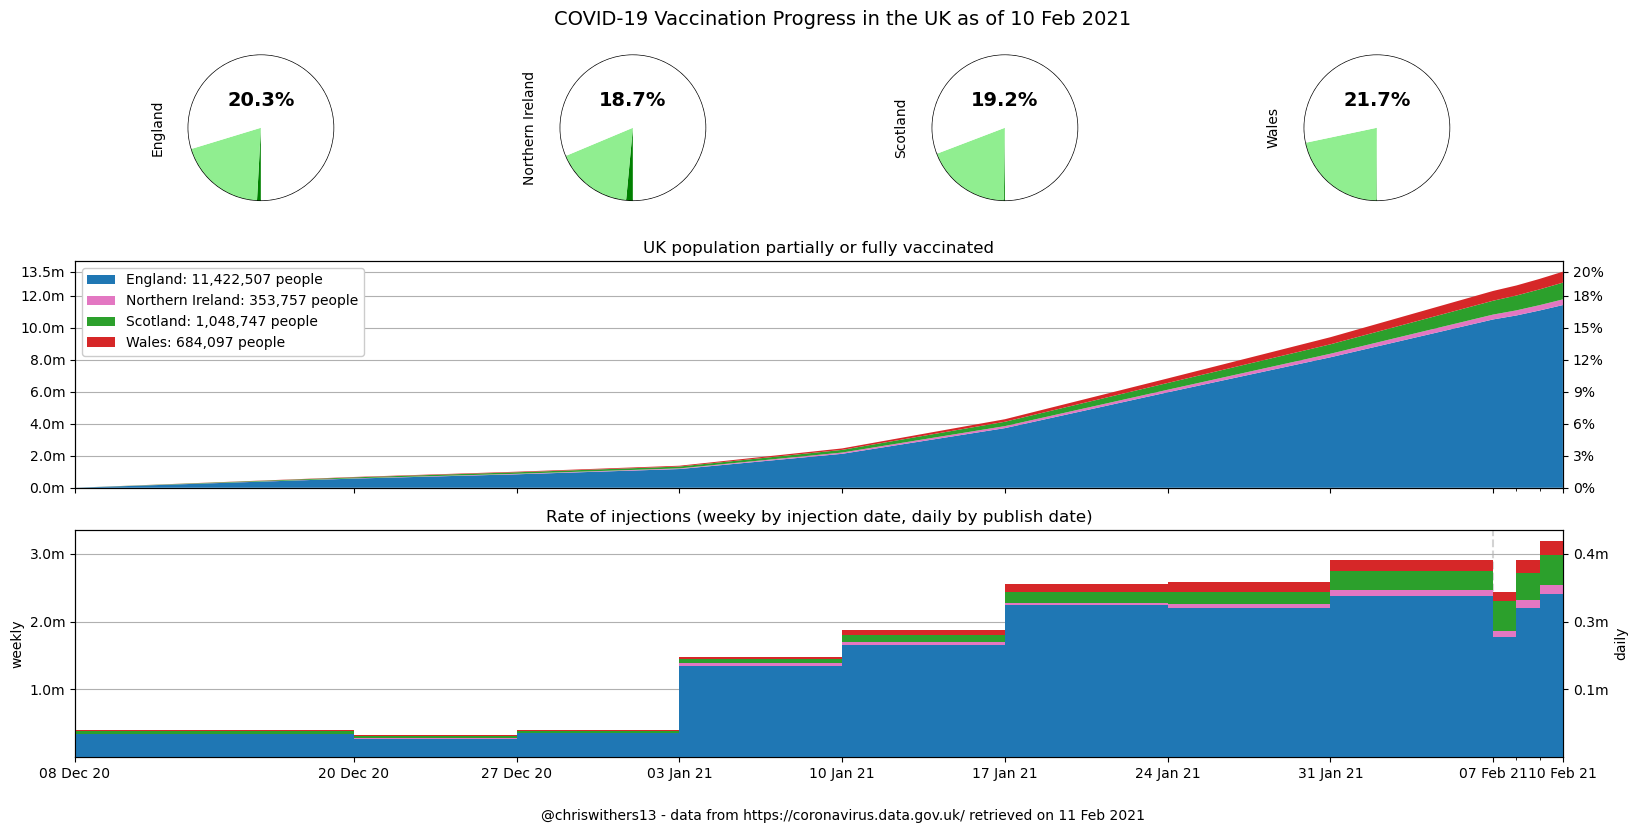

In [59]:
results = vaccination_dashboard()
display(results, f"partial: {results['any'].sum():,.0f}", f"full: {results['full'].sum():,.0f}")

In [60]:
vaccination_changes()

In [61]:
download(nation, nation, new_admissions, *standard_metrics, release=release)

PosixPath('/Users/chris/coronavirus/data/nation_2021-02-11.csv')

In [62]:
download(region, region, *standard_metrics, release=release)

PosixPath('/Users/chris/coronavirus/data/region_2021-02-11.csv')

In [63]:
download(ltla, ltla, *standard_metrics, release=release)

PosixPath('/Users/chris/coronavirus/data/ltla_2021-02-11.csv')